In [45]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mlp
import matplotlib.pyplot as plt
import geopandas as gp
import os

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.facecolor"] = "w"


In [2]:
#sys.path.append('../../../core/')
os.chdir("../../../core")
import GT_helper_functions as hf
import GT_load_data as data

base_dir = "../../Outcome Measurement Data/MALARIA/"

In [3]:
# Esto no incluye toda las áreas del país. Sólo las áreas vistas en la base de datos de notifs.
notifs_das2depto = {
    "Escuintla": 5,
    "Alta Verapaz": 16,
    "Izabal" : 18,
    "Suchitepéquez" : 10,
    "Santa Rosa" : 6,
    "Retalhuleu" : 11,
    "Petén Norte" : 17,
    "Petén SurOccidental" : 17,
    "Huehuetenango" : 13,
    "Quiché" : 14,
    "Petén Sur Oriental" : 17,
    "Baja Verapaz" : 15,
    "Sololá" : 7,
    "Zacapa" : 18,
    "Ixcán" : 14,
    "San Marcos" : 12,
    "Chimaltenango" : 4,
    "Guatemala Central" : 1,
    "Guatemala Sur" : 1,
    "Ixil" : 14,
    "Jutiapa" : 22,
    "Chiquimula" : 20,
    "Ixcan" : 14,
    "El Progreso" : 2,
    "Guatemala Nororiental" : 1,
    "Quetzaltenango" : 9,
}

In [8]:
deptos = gp.read_file("../../Covariates and Other Data/GIS/GT-IGN-cartografia_basica-Departamentos.geojson")
deptos = deptos[lambda x: x.CODIGO.astype(int) <= 2200]

In [9]:
bednets = pd.read_csv(base_dir + "GTM - Bednets Distr_1.tar.gz", index_col = 0 )

/home/guillermo/.local/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [10]:
notifs = pd.read_excel(base_dir + "Base de datos 2016 - 2018 NAD Consolidado 04.06.xlsx")


In [11]:
bednetsYears = bednets.groupby(["year", "CodDepto_e"]).Pabellones.sum().unstack(0).fillna(0)
bednetsYears

year,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
CodDepto_e,,,,,,,
2.0,0.0,0.0,0.0,5137.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,5000.0,346.0,0.0,0.0
5.0,315925.0,63305.0,127630.0,375675.0,125124.0,40000.0,17309.0
6.0,0.0,0.0,11907.0,17330.0,18250.0,0.0,0.0
7.0,0.0,0.0,0.0,18210.0,3872.0,422.0,0.0
9.0,0.0,0.0,0.0,23337.0,34497.0,446.0,4090.0
10.0,191385.0,142365.0,0.0,170166.0,139934.0,59.0,0.0
11.0,29615.0,28312.0,0.0,45595.0,74900.0,0.0,27937.0
12.0,38974.0,40882.0,100.0,49954.0,20518.0,0.0,0.0


In [12]:
notifs["deptocode"] = notifs.AREA.map(str.strip).map(notifs_das2depto.get)

In [13]:
notifsYear = notifs.groupby(["Año", "deptocode"]).AREA.count().unstack(0).fillna(0)
notifsYear

Año,1899.0,2014.0,2015.0,2016.0,2017.0,2018.0
deptocode,,,,,,
1,0.0,0.0,3.0,11.0,13.0,0.0
2,0.0,0.0,2.0,0.0,2.0,0.0
4,0.0,0.0,12.0,3.0,2.0,0.0
5,5.0,1.0,3589.0,3194.0,2437.0,878.0
6,0.0,2.0,71.0,149.0,37.0,8.0
7,0.0,0.0,16.0,10.0,1.0,0.0
9,0.0,0.0,3.0,0.0,0.0,0.0
10,1.0,0.0,152.0,241.0,300.0,114.0
11,0.0,0.0,105.0,75.0,34.0,9.0


In [20]:
incidence = notifsYear.stack().rename("notifs").reset_index()
incidence["Population"] = incidence.apply(lambda x: 
                                          hf.GTDeptoPopulation(x.deptocode, x["Año"]), 1)

In [21]:
incidence["incidence"] = incidence.notifs/incidence.Population

In [29]:
incidence = incidence[incidence["Año"]>2014]
incidence = incidence.rename(columns={"Año":  "Year"}).pivot_table(values = "incidence", index = "deptocode",
                                           columns="Year")

8.730781079184767e-07

/home/guillermo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


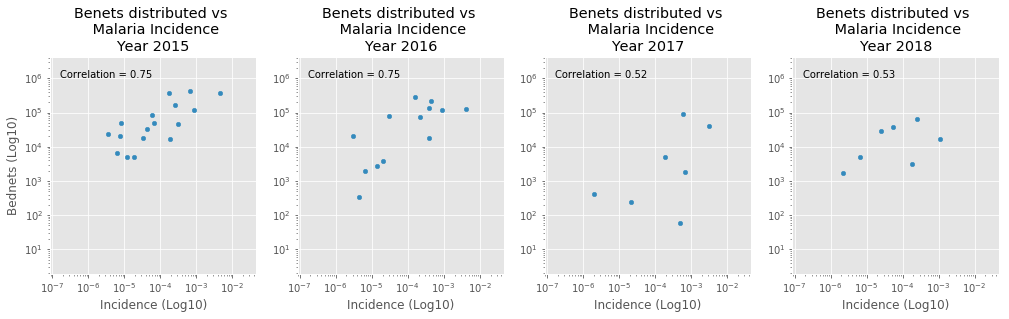

In [56]:
ymax = bednetsYears.max().max()
xmax = notifsYear.max().max()

def plotNotifsVsBednets(ax, year = 2015, ylabel = True):
    temp = pd.DataFrame(data = [bednetsYears[year], incidence[year]]).T.fillna(0)
    #temp = np.log10(temp)
    corr = np.round(np.log10(temp).corr().values[0][1], 2)
    temp.columns = ["Bednets (Log10)", "Incidence (Log10)"]
    ax.set_yscale("log", basey=10)
    ax.set_xscale("log", basex=10)
    temp.plot.scatter("Incidence (Log10)", "Bednets (Log10)",
                      title="Benets distributed vs \n Malaria Incidence\nYear "+ str(year),
                          ax = ax)
    plt.text(0.05,0.9, "Correlation = "+str(corr), transform=ax.transAxes)
    if ylabel == False:
        ax.set_ylabel("")

mlp.rcParams['figure.figsize'] = [17.0, 4.0]
fig, axes = plt.subplots(1,4)
xlims = (np.min(list(filter(lambda x: x>0, incidence.values.flatten())))/10, 
                np.max(incidence.values.flatten())*10)
ylims = (np.min(list(filter(lambda x: x>0, bednetsYears.values.flatten())))/10, 
                np.max(bednetsYears.values.flatten())*10)
    
plotNotifsVsBednets(axes[0], 2015)
plotNotifsVsBednets(axes[1], 2016, False)
plotNotifsVsBednets(axes[2], 2017, False)
plotNotifsVsBednets(axes[3], 2018, False)
for ax in axes:
    ax.set_xlim(xlims[0], xlims[1])
    ax.set_ylim(ylims[0], ylims[1])


In [12]:
pblYears = bednetsYears.divide(1000).reset_index()\
                         .assign(deptocode=lambda x: (x.CodDepto_e * 100).astype(int).astype(str)\
                                 .map(lambda y: y if y != 1 else "101"))

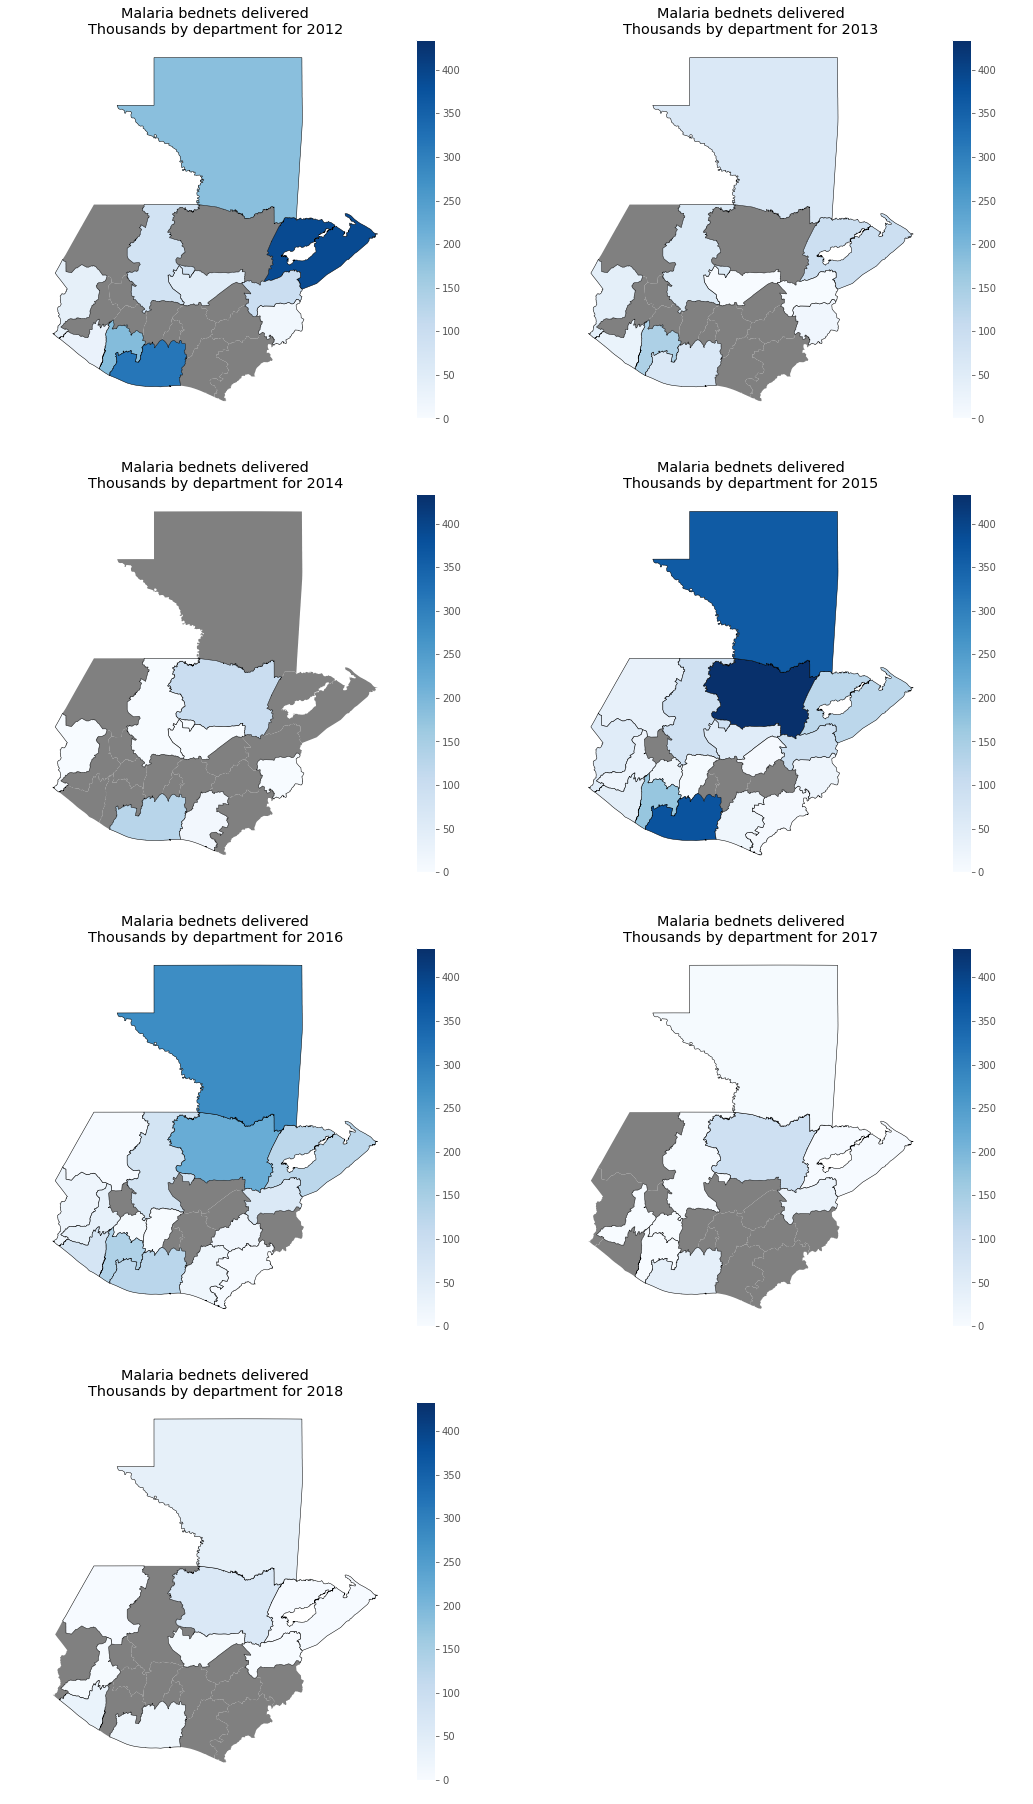

In [13]:
vmax = pblYears[list(range(2012,2018))].max().max()

side = 8
n = 7
vmin = 0
#vmax = 8
f, axes = plt.subplots(int(np.ceil(n/2)), 2, figsize=(side*2*1.1, side*np.ceil(n/2) ))
i = 2012
for row in axes:
    for ax in row:
        if i not in pblYears:
            ax.axis("off")
            continue
        temp3 = deptos.merge(pblYears[[i, "deptocode"]], 
                             left_on="CODIGO", right_on = "deptocode", how="left" ).fillna(0)
        temp3[temp3[i] == 0].plot(ax=ax, color="grey")
        if sum(temp3[i] > 0) > 0:
            temp3[temp3[i] > 0].plot(i, ax = ax, cmap = "Blues", 
                                             legend=True, edgecolor="black",
                                             vmin = vmin, vmax = vmax)
        ax.axis('off')
        ax.set_title("Malaria bednets delivered\nThousands by department for "+ str(i))
        i += 1